# SFC PAYGo Solar Credit Repayment Competition

<br>

In [50]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import ast
from fancyimpute import IterativeImputer
from dateutil.relativedelta import *

In [2]:
train = pd.read_csv("Train.csv")

In [3]:
train.head()

ID                                   TransactionDates  \
0  ID_MR53LEX  ['04-2018', '05-2018', '06-2018', '07-2018', '...   
1  ID_3D7NQUH  ['04-2018', '05-2018', '06-2018', '07-2018', '...   
2  ID_0IWQNPI  ['02-2020', '03-2020', '04-2020', '05-2020', '...   
3  ID_IY8SYB9  ['09-2017', '10-2017', '11-2017', '12-2017', '...   
4  ID_9XHL7VZ  ['09-2017', '10-2017', '11-2017', '12-2017', '...   

                                     PaymentsHistory     m1      m2      m3  \
0  [3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...  880.0   930.0   495.0   
1  [2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...  660.0   935.0   935.0   
2      [2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]  700.0  1350.0  1550.0   
3  [2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...  580.0   480.0   800.0   
4  [2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...   40.0   440.0   460.0   

       m4      m5      m6  
0   715.0   220.0   385.0  
1   825.0   770.0   935.0  
2  1400.0  1450.0  1200.0  
3  1260.0  1650.0   530.0  
4   360.0    80.0   330.0

In [4]:
train.dtypes

ID                   object
TransactionDates     object
PaymentsHistory      object
m1                  float64
m2                  float64
m3                  float64
m4                  float64
m5                  float64
m6                  float64
dtype: object

In [5]:
train.shape

(28007, 9)

In [6]:
train.describe()

m1            m2            m3            m4            m5  \
count  28007.000000  28007.000000  28007.000000  28007.000000  28007.000000   
mean     815.411683    807.101617    797.641161    815.011033    827.719463   
std      686.130805    839.772177    696.809281    715.582046    796.379837   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%      275.000000    250.000000    220.000000    230.000000    220.000000   
50%      820.000000    800.000000    790.000000    815.000000    840.000000   
75%     1200.000000   1200.000000   1200.000000   1200.000000   1205.000000   
max    33890.000000  94044.000000  32005.000000  33403.000000  64106.000000   

                 m6  
count  28007.000000  
mean     692.115150  
std     1416.301221  
min        1.000000  
25%      130.000000  
50%      480.000000  
75%      915.000000  
max    96814.000000

In [7]:
train['FirstTransactionDate'] = np.nan

In [8]:
train['LastTransactionDate'] = np.nan

In [9]:
train["TotalPastPayments"] = np.nan

In [10]:
sum_payments = 0.0

for i,data in train.iterrows():
    transaction_dates = []
    payments = []
    dates = data.iloc[1][1:-1].split(", ")
    paymentshistory = data.iloc[2][1:-1].split(", ")
    for date in dates:
        transaction_dates.append(pd.to_datetime(date[1:-1]).date())
    train.TransactionDates.iloc[i] = np.array(transaction_dates)
    train.LastTransactionDate.iloc[i] = transaction_dates[-1]
    train.FirstTransactionDate.iloc[i] = transaction_dates[0]
    
    for payment in paymentshistory:
        payments.append(float(payment))
    train.PaymentsHistory.iloc[i] = np.array(payments)
    
    train.TotalPastPayments.iloc[i] = sum(payments)
train.head()

/Users/devanshimittal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ID                                   TransactionDates  \
0  ID_MR53LEX  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
1  ID_3D7NQUH  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
2  ID_0IWQNPI  [2020-02-01, 2020-03-01, 2020-04-01, 2020-05-0...   
3  ID_IY8SYB9  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   
4  ID_9XHL7VZ  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   

                                     PaymentsHistory     m1      m2      m3  \
0  [3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...  880.0   930.0   495.0   
1  [2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...  660.0   935.0   935.0   
2      [2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]  700.0  1350.0  1550.0   
3  [2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...  580.0   480.0   800.0   
4  [2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...   40.0   440.0   460.0   

       m4      m5      m6 FirstTransactionDate LastTransactionDate  \
0   715.0   220.0   385.0           2018-04-01          2020-11-01   
1   825.0   770.0   935.0           2018-04-01          2020-11-01   
2  1400.0  1450.0  1200.0           2020-02-01          2020-07-01   
3  1260.0  1650.0   530.0           2017-09-01          2018-06-01   
4   360.0    80.0   330.0           2017-09-01          2019-11-01   

   TotalPastPayments  
0            16035.0  
1            22136.0  
2             6760.0  
3            11260.0  
4             7779.0

In [11]:
date_list = []
for i,data in train.iterrows():
    dates = data[1]
    for date in dates:
        if not date in date_list:
            date_list.append(date)
date_list.sort()

            

In [12]:
for col in date_list:
    train[col] = np.nan
train.head()

ID                                   TransactionDates  \
0  ID_MR53LEX  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
1  ID_3D7NQUH  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
2  ID_0IWQNPI  [2020-02-01, 2020-03-01, 2020-04-01, 2020-05-0...   
3  ID_IY8SYB9  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   
4  ID_9XHL7VZ  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   

                                     PaymentsHistory     m1      m2      m3  \
0  [3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...  880.0   930.0   495.0   
1  [2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...  660.0   935.0   935.0   
2      [2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]  700.0  1350.0  1550.0   
3  [2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...  580.0   480.0   800.0   
4  [2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...   40.0   440.0   460.0   

       m4      m5      m6 FirstTransactionDate  ... 2020-02-01  2020-03-01  \
0   715.0   220.0   385.0           2018-04-01  ...        NaN         NaN   
1   825.0   770.0   935.0           2018-04-01  ...        NaN         NaN   
2  1400.0  1450.0  1200.0           2020-02-01  ...        NaN         NaN   
3  1260.0  1650.0   530.0           2017-09-01  ...        NaN         NaN   
4   360.0    80.0   330.0           2017-09-01  ...        NaN         NaN   

   2020-04-01  2020-05-01  2020-06-01  2020-07-01  2020-08-01  2020-09-01  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2020-10-01  2020-11-01  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 73 columns]

In [13]:
for i, data in train.iterrows():
    for j in range(len(data[2])):
        train[data[1][j]][i] = data[2][j]

<ipython-input-13-cebc60107db1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[data[1][j]][i] = data[2][j]


In [14]:
for i, data in train.iterrows():
    first = data[9]
    last = data[10]
    while first != last:
        first += relativedelta(months=+1)
        if train.loc[i,first]== float("nan"):
            train.loc[i,first] = 0.0
            
            
            
        

In [15]:
train.drop(columns=["TransactionDates", "PaymentsHistory"], inplace = True)
train.head()

ID     m1      m2      m3      m4      m5      m6  \
0  ID_MR53LEX  880.0   930.0   495.0   715.0   220.0   385.0   
1  ID_3D7NQUH  660.0   935.0   935.0   825.0   770.0   935.0   
2  ID_0IWQNPI  700.0  1350.0  1550.0  1400.0  1450.0  1200.0   
3  ID_IY8SYB9  580.0   480.0   800.0  1260.0  1650.0   530.0   
4  ID_9XHL7VZ   40.0   440.0   460.0   360.0    80.0   330.0   

  FirstTransactionDate LastTransactionDate  TotalPastPayments  ...  \
0           2018-04-01          2020-11-01            16035.0  ...   
1           2018-04-01          2020-11-01            22136.0  ...   
2           2020-02-01          2020-07-01             6760.0  ...   
3           2017-09-01          2018-06-01            11260.0  ...   
4           2017-09-01          2019-11-01             7779.0  ...   

   2020-02-01  2020-03-01  2020-04-01  2020-05-01  2020-06-01  2020-07-01  \
0       120.0       260.0       610.0       230.0       390.0       660.0   
1       655.0       605.0       495.0       442.0       495.0       605.0   
2      2850.0      1500.0      1350.0       610.0       200.0       250.0   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2020-08-01  2020-09-01  2020-10-01  2020-11-01  
0      1200.0      1320.0       280.0       770.0  
1       660.0       660.0       655.0       770.0  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  

[5 rows x 71 columns]

In [16]:
train.columns = train.columns.astype(str)

In [17]:
train.fillna(0, inplace=True)

In [18]:
train.head()

ID     m1      m2      m3      m4      m5      m6  \
0  ID_MR53LEX  880.0   930.0   495.0   715.0   220.0   385.0   
1  ID_3D7NQUH  660.0   935.0   935.0   825.0   770.0   935.0   
2  ID_0IWQNPI  700.0  1350.0  1550.0  1400.0  1450.0  1200.0   
3  ID_IY8SYB9  580.0   480.0   800.0  1260.0  1650.0   530.0   
4  ID_9XHL7VZ   40.0   440.0   460.0   360.0    80.0   330.0   

  FirstTransactionDate LastTransactionDate  TotalPastPayments  ...  \
0           2018-04-01          2020-11-01            16035.0  ...   
1           2018-04-01          2020-11-01            22136.0  ...   
2           2020-02-01          2020-07-01             6760.0  ...   
3           2017-09-01          2018-06-01            11260.0  ...   
4           2017-09-01          2019-11-01             7779.0  ...   

   2020-02-01  2020-03-01  2020-04-01  2020-05-01  2020-06-01  2020-07-01  \
0       120.0       260.0       610.0       230.0       390.0       660.0   
1       655.0       605.0       495.0       442.0       495.0       605.0   
2      2850.0      1500.0      1350.0       610.0       200.0       250.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-08-01  2020-09-01  2020-10-01  2020-11-01  
0      1200.0      1320.0       280.0       770.0  
1       660.0       660.0       655.0       770.0  
2         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0  

[5 rows x 71 columns]

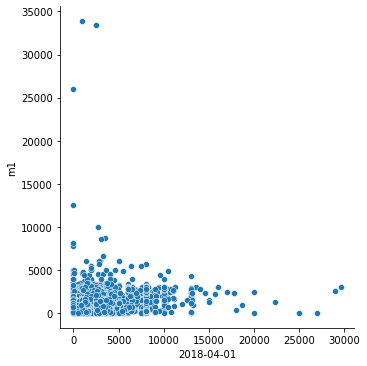

In [19]:
sns.relplot(x="2018-04-01",y="m1",data=train,kind="scatter")

In [20]:
train.describe()

m1            m2            m3            m4            m5  \
count  28007.000000  28007.000000  28007.000000  28007.000000  28007.000000   
mean     815.411683    807.101617    797.641161    815.011033    827.719463   
std      686.130805    839.772177    696.809281    715.582046    796.379837   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%      275.000000    250.000000    220.000000    230.000000    220.000000   
50%      820.000000    800.000000    790.000000    815.000000    840.000000   
75%     1200.000000   1200.000000   1200.000000   1200.000000   1205.000000   
max    33890.000000  94044.000000  32005.000000  33403.000000  64106.000000   

                 m6  TotalPastPayments    2015-11-01    2015-12-01  \
count  28007.000000       28007.000000  28007.000000  28007.000000   
mean     692.115150       15076.502624      0.722141      6.849716   
std     1416.301221        8564.361449     40.714982    163.963949   
min        1.000000        2220.000000      0.000000      0.000000   
25%      130.000000        8900.000000      0.000000      0.000000   
50%      480.000000       11650.000000      0.000000      0.000000   
75%      915.000000       23600.000000      0.000000      0.000000   
max    96814.000000       95189.000000   3000.000000  13300.000000   

         2016-01-01  ...    2020-02-01    2020-03-01    2020-04-01  \
count  28007.000000  ...  28007.000000  28007.000000  28007.000000   
mean       2.357054  ...    499.773200    338.879316    294.982004   
std       52.237212  ...    901.221569    497.098470    455.228920   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...    720.000000    665.000000    550.000000   
max     2100.000000  ...   7000.000000  10315.000000   5230.000000   

         2020-05-01    2020-06-01    2020-07-01    2020-08-01    2020-09-01  \
count  28007.000000  28007.000000  28007.000000  28007.000000  28007.000000   
mean     286.568215    227.774806    198.694362    151.029921    114.242261   
std      493.424879    422.159020    416.402485    332.602527    322.262146   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%      495.000000    300.000000    200.000000     60.000000      0.000000   
max    31590.000000  19165.000000  25428.000000   3275.000000  24070.000000   

         2020-10-01    2020-11-01  
count  28007.000000  28007.000000  
mean      92.591067     68.795230  
std      295.654127    223.000587  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    24350.000000   2870.000000  

[8 rows x 68 columns]

In [57]:
def print_boxplot(attr):
    sns.boxplot(x=train[attr])
    


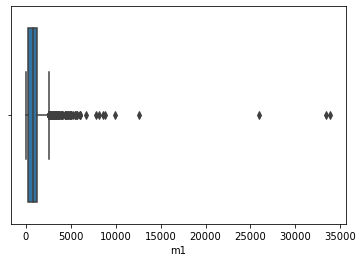

In [58]:
print_boxplot("m1")

In [62]:
train = train.loc[train.m1<=10000,:]

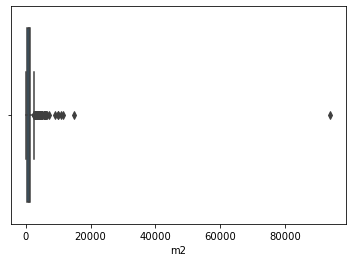

In [63]:
print_boxplot("m2")

In [69]:
train = train.loc[train.m2<=6000,:]

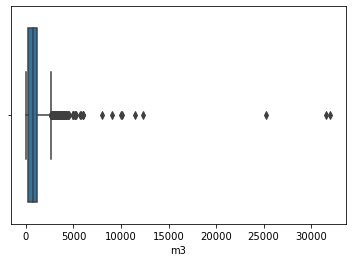

In [70]:
print_boxplot("m3")

In [74]:
train = train.loc[train.m3<=15000,:]

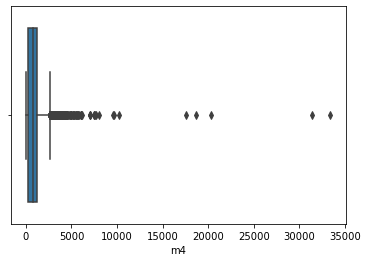

In [76]:
print_boxplot("m4")

In [79]:
train = train.loc[train.m4<=10000,:]

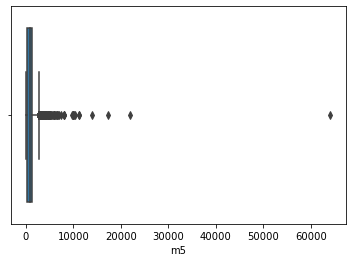

In [80]:
print_boxplot("m5")

In [83]:
train = train.loc[train.m5<=10000,:]

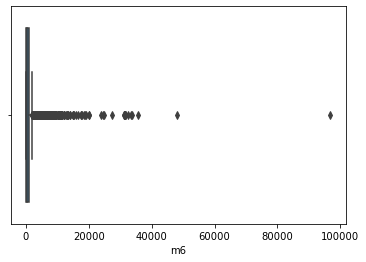

In [84]:
print_boxplot("m6")

In [87]:
train = train.loc[train.m6<=40000,:]

In [21]:
test = pd.read_csv("Test.csv")

In [22]:
test.head()

ID                                   TransactionDates  \
0  ID_6L67PAA  ['12-2015', '01-2016', '02-2016', '03-2016', '...   
1  ID_VJ80SX2  ['12-2015', '01-2016', '02-2016', '03-2016', '...   
2  ID_7OU9HLK  ['12-2015', '01-2016', '03-2016', '05-2016', '...   
3  ID_WVWTPGK  ['12-2015', '01-2016', '02-2016', '03-2016', '...   
4  ID_04DSDQS  ['12-2015', '01-2016', '02-2016', '03-2016', '...   

                                     PaymentsHistory  
0    [4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]  
1  [3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...  
2  [2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87...  
3  [4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,...  
4  [4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1...

In [23]:
test.dtypes

ID                  object
TransactionDates    object
PaymentsHistory     object
dtype: object

In [24]:
test.shape

(9336, 3)

In [25]:
test.nunique()

ID                  9336
TransactionDates    2938
PaymentsHistory     9290
dtype: int64

In [26]:
test.isnull().sum()

ID                  0
TransactionDates    0
PaymentsHistory     0
dtype: int64

In [27]:
test['FirstTransactionDate'] = np.nan

In [28]:
test['LastTransactionDate'] = np.nan

In [29]:
test["TotalPastPayments"] = np.nan

In [30]:
sum_payments = 0.0

for i,data in test.iterrows():
    transaction_dates = []
    payments = []
    dates = data.iloc[1][1:-1].split(", ")
    paymentshistory = data.iloc[2][1:-1].split(", ")
    for date in dates:
        transaction_dates.append(pd.to_datetime(date[1:-1]).date())
    test.TransactionDates.iloc[i] = np.array(transaction_dates)
    test.LastTransactionDate.iloc[i] = transaction_dates[-1]
    test.FirstTransactionDate.iloc[i] = transaction_dates[0]
    
    for payment in paymentshistory:
        payments.append(float(payment))
    test.PaymentsHistory.iloc[i] = np.array(payments)
    
    test.TotalPastPayments.iloc[i] = sum(payments)


/Users/devanshimittal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
date_list_test = []
for i,data in test.iterrows():
    dates = data[1]
    for date in dates:
        if not date in date_list_test:
            date_list_test.append(date)
date_list_test.sort()


In [32]:
for col in date_list_test:
    test[col] = np.nan


In [33]:
for i, data in test.iterrows():
    for j in range(len(data[2])):
        test[data[1][j]][i] = data[2][j]

<ipython-input-33-33bed966026e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[data[1][j]][i] = data[2][j]


In [34]:
test.drop(columns=["TransactionDates", "PaymentsHistory"], inplace = True)


In [35]:
test.columns = test.columns.astype(str)

In [36]:
test.fillna(0, inplace=True)

In [37]:
test.head()

ID FirstTransactionDate LastTransactionDate  TotalPastPayments  \
0  ID_6L67PAA           2015-12-01          2016-07-01             8600.0   
1  ID_VJ80SX2           2015-12-01          2016-06-01             9000.0   
2  ID_7OU9HLK           2015-12-01          2017-02-01             6075.0   
3  ID_WVWTPGK           2015-12-01          2016-11-01            15195.0   
4  ID_04DSDQS           2015-12-01          2016-08-01            11590.0   

   2015-11-01  2015-12-01  2016-01-01  2016-02-01  2016-03-01  2016-04-01  \
0         0.0      4000.0      1050.0      1050.0      1050.0         0.0   
1         0.0      3000.0       850.0       750.0      1500.0       650.0   
2         0.0      2400.0       300.0         0.0       500.0         0.0   
3         0.0      4700.0      1200.0       950.0      1200.0       900.0   
4         0.0      4800.0       750.0       995.0       995.0      1300.0   

   ...  2020-02-01  2020-03-01  2020-04-01  2020-05-01  2020-06-01  \
0  ...         0.0         0.0         0.0         0.0         0.0   
1  ...         0.0         0.0         0.0         0.0         0.0   
2  ...         0.0         0.0         0.0         0.0         0.0   
3  ...         0.0         0.0         0.0         0.0         0.0   
4  ...         0.0         0.0         0.0         0.0         0.0   

   2020-07-01  2020-08-01  2020-09-01  2020-10-01  2020-11-01  
0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0         0.0  

[5 rows x 65 columns]

In [38]:
metadata = pd.read_csv("metadata.csv")

/Users/devanshimittal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
metadata.head()

ID     RegistrationDate  Deposit           UpsellDate  \
0  ID_K00S4N4  2015-12-10 00:00:00     2000                  NaN   
1  ID_6L67PAA  2015-12-09 00:00:00     2000                  NaN   
2  ID_102CV85  2015-12-18 00:00:00     2000  2018-03-29 10:14:58   
3  ID_HXBJFHB  2015-11-25 00:00:00     2000                  NaN   
4  ID_3K9VZ5J  2015-12-02 00:00:00     2000                  NaN   

   AccessoryRate PaymentMethod rateTypeEntity  RatePerUnit  DaysOnDeposit  \
0            0.0      FINANCED          DAILY           35              7   
1            0.0      FINANCED          DAILY           35              7   
2           35.0      FINANCED          DAILY           35              7   
3            0.0      FINANCED          DAILY           35              7   
4            0.0      FINANCED          DAILY           35              7   

  MainApplicantGender   Age              Region       Town Occupation  \
0                Male  41.0  Mount Kenya Region       Embu      Other   
1                Male  33.0        Coast Region     Kilifi      Other   
2              Female  48.0      Nairobi Region    Makueni   Business   
3              Female  43.0                 NaN    UNKNOWN    Teacher   
4              Female  56.0  Mount Kenya Region  Kirinyaga      Other   

  SupplierName  Term  TotalContractValue     ExpectedTermDate  \
0      d_light   364             14740.0  2016-12-08 00:00:00   
1      d_light   364             14740.0  2016-12-07 00:00:00   
2      d_light   392             29480.0  2017-01-13 00:00:00   
3      d_light   364             14740.0  2016-11-23 00:00:00   
4      d_light   364             14740.0  2016-11-30 00:00:00   

      FirstPaymentDate      LastPaymentDate  
0  2015-12-10 09:52:35  2016-10-23 04:52:30  
1  2015-12-09 13:14:03  2020-05-24 15:32:18  
2  2015-12-18 06:22:34  2017-02-01 15:23:44  
3  2015-11-25 13:25:57  2017-05-22 16:46:54  
4  2015-12-05 10:34:32  2017-05-12 16:50:52

In [40]:
metadata.dtypes

ID                      object
RegistrationDate        object
Deposit                  int64
UpsellDate              object
AccessoryRate          float64
PaymentMethod           object
rateTypeEntity          object
RatePerUnit              int64
DaysOnDeposit            int64
MainApplicantGender     object
Age                    float64
Region                  object
Town                    object
Occupation              object
SupplierName            object
Term                     int64
TotalContractValue     float64
ExpectedTermDate        object
FirstPaymentDate        object
LastPaymentDate         object
dtype: object

In [41]:
metadata.shape

(37343, 20)

In [42]:
metadata.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'UpsellDate', 'AccessoryRate',
       'PaymentMethod', 'rateTypeEntity', 'RatePerUnit', 'DaysOnDeposit',
       'MainApplicantGender', 'Age', 'Region', 'Town', 'Occupation',
       'SupplierName', 'Term', 'TotalContractValue', 'ExpectedTermDate',
       'FirstPaymentDate', 'LastPaymentDate'],
      dtype='object')

In [43]:
metadata.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
37338    False
37339    False
37340    False
37341    False
37342    False
Length: 37343, dtype: bool

In [44]:
metadata.RegistrationDate = pd.to_datetime(metadata.RegistrationDate, format="%Y/%m/%d %H:%M:%S")
metadata.RegistrationDate

0       2015-12-10 00:00:00
1       2015-12-09 00:00:00
2       2015-12-18 00:00:00
3       2015-11-25 00:00:00
4       2015-12-02 00:00:00
                ...        
37338   2020-02-20 18:26:52
37339   2020-02-20 18:30:59
37340   2020-02-20 18:42:26
37341   2020-02-20 18:46:30
37342   2020-02-20 19:30:43
Name: RegistrationDate, Length: 37343, dtype: datetime64[ns]

In [45]:
metadata.ExpectedTermDate = pd.to_datetime(metadata.ExpectedTermDate, format="%Y/%m/%d %H:%M:%S")
metadata.FirstPaymentDate = pd.to_datetime(metadata.FirstPaymentDate, format="%Y/%m/%d %H:%M:%S")
metadata.LastPaymentDate = pd.to_datetime(metadata.LastPaymentDate, format="%Y/%m/%d %H:%M:%S")
metadata.UpsellDate = pd.to_datetime(metadata.UpsellDate, format="%Y/%m/%d %H:%M:%S")

In [46]:
metadata.dtypes

ID                             object
RegistrationDate       datetime64[ns]
Deposit                         int64
UpsellDate             datetime64[ns]
AccessoryRate                 float64
PaymentMethod                  object
rateTypeEntity                 object
RatePerUnit                     int64
DaysOnDeposit                   int64
MainApplicantGender            object
Age                           float64
Region                         object
Town                           object
Occupation                     object
SupplierName                   object
Term                            int64
TotalContractValue            float64
ExpectedTermDate       datetime64[ns]
FirstPaymentDate       datetime64[ns]
LastPaymentDate        datetime64[ns]
dtype: object

In [47]:
metadata.isnull().sum()

ID                         0
RegistrationDate           0
Deposit                    0
UpsellDate             36370
AccessoryRate              0
PaymentMethod              0
rateTypeEntity             0
RatePerUnit                0
DaysOnDeposit              0
MainApplicantGender        0
Age                     6939
Region                  1934
Town                       0
Occupation                 0
SupplierName               0
Term                       0
TotalContractValue         0
ExpectedTermDate           0
FirstPaymentDate           0
LastPaymentDate            0
dtype: int64

In [48]:
metadata.isnull().sum()/metadata.shape[0]*100

ID                      0.000000
RegistrationDate        0.000000
Deposit                 0.000000
UpsellDate             97.394425
AccessoryRate           0.000000
PaymentMethod           0.000000
rateTypeEntity          0.000000
RatePerUnit             0.000000
DaysOnDeposit           0.000000
MainApplicantGender     0.000000
Age                    18.581796
Region                  5.179016
Town                    0.000000
Occupation              0.000000
SupplierName            0.000000
Term                    0.000000
TotalContractValue      0.000000
ExpectedTermDate        0.000000
FirstPaymentDate        0.000000
LastPaymentDate         0.000000
dtype: float64

<AxesSubplot:>

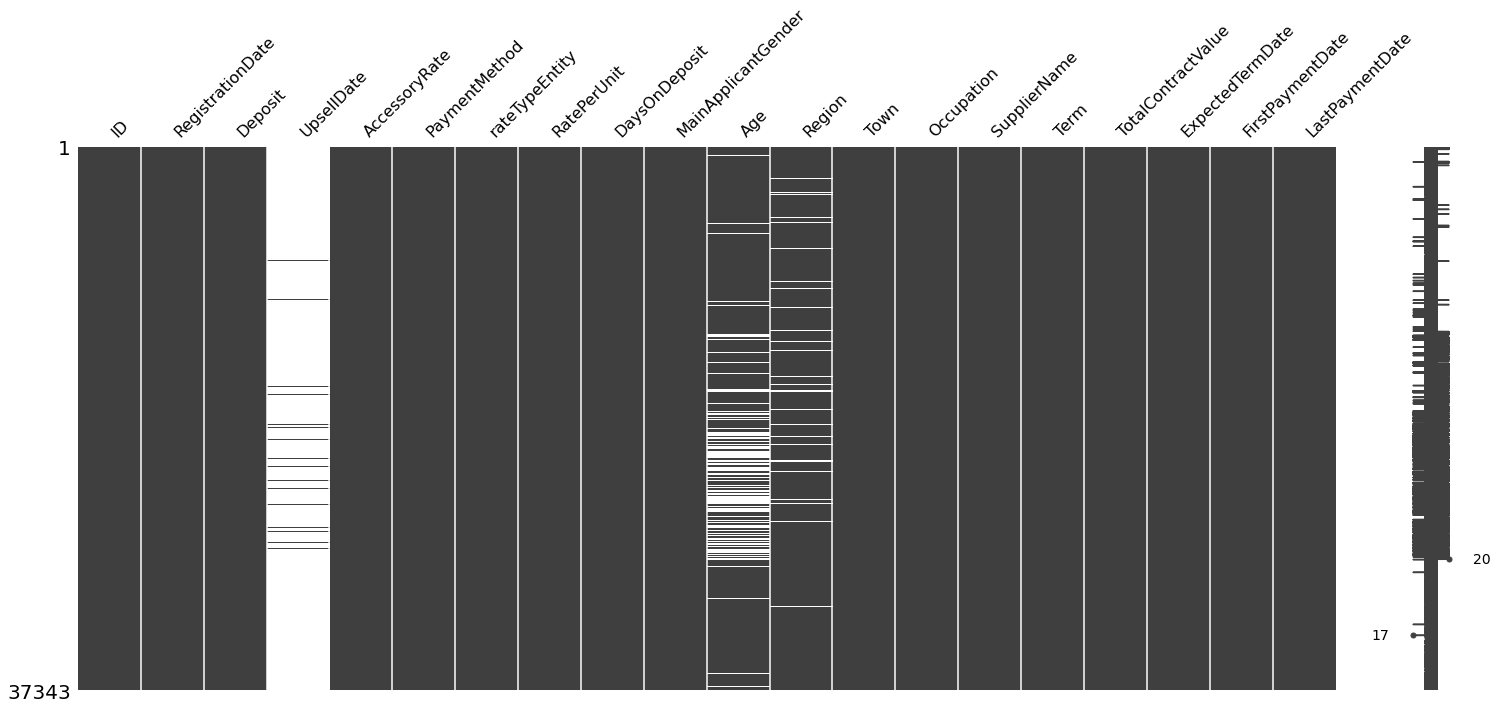

In [88]:
msno.matrix(metadata)

Dropping UpsellDate because of too many missing values

In [89]:
metadata.drop(columns = "UpsellDate", inplace = True)

In [90]:
metadata.Region.unique()

array(['Mount Kenya Region', 'Coast Region', 'Nairobi Region', nan,
       'South Rift', 'Western', 'North Rift', 'Nyanza'], dtype=object)

In [91]:
metadata.describe()

Deposit  AccessoryRate   RatePerUnit  DaysOnDeposit           Age  \
count  37343.000000   37343.000000  37343.000000   37343.000000  30404.000000   
mean    2348.631685       1.136090     49.923868       4.600835     38.855677   
std      417.814614       7.791789     57.500215       3.429060     12.300827   
min        0.000000       0.000000     35.000000       0.000000     19.000000   
25%     2000.000000       0.000000     40.000000       3.000000     29.000000   
50%     2000.000000       0.000000     40.000000       3.000000     36.000000   
75%     2500.000000       0.000000     55.000000       7.000000     46.000000   
max     8000.000000     240.000000   4000.000000      60.000000    120.000000   

               Term  TotalContractValue  
count  37343.000000        37343.000000  
mean     412.427657        22953.005142  
std      121.602544        10149.863172  
min       10.000000        10800.000000  
25%      364.000000        16560.000000  
50%      364.000000        16560.000000  
75%      547.000000        33080.000000  
max      626.000000        64484.000000

<AxesSubplot:>

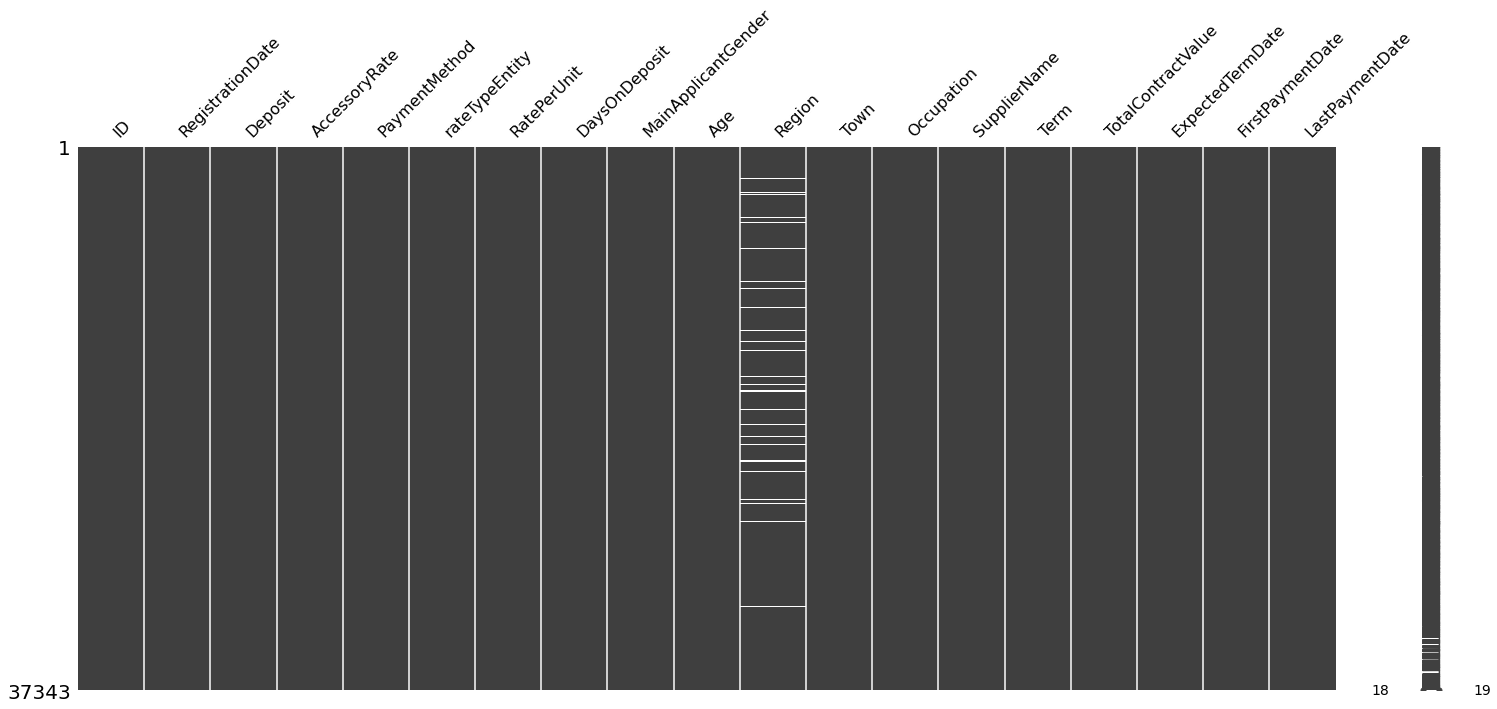

In [92]:
impute = metadata[['Deposit', 'AccessoryRate', 'RatePerUnit', 'DaysOnDeposit', 
                   'Term', 'TotalContractValue', 'Age']]
impute = impute.to_numpy()
impute = IterativeImputer().fit_transform(impute)
metadata.Age = impute[:,-1]
msno.matrix(metadata)

<AxesSubplot:xlabel='Age'>

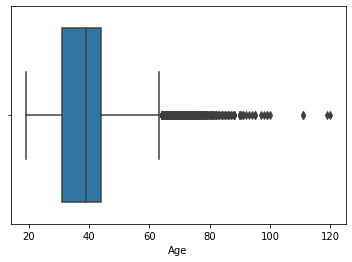

In [93]:
sns.boxplot(x=metadata.Age)

In [94]:
metadata.loc[metadata.Age>100]

ID    RegistrationDate  Deposit  AccessoryRate PaymentMethod  \
6134   ID_OCAFVZ1 2017-08-16 14:54:02     2000            0.0      FINANCED   
25499  ID_96DYWMV 2018-04-16 09:33:10     2500            0.0      FINANCED   
27110  ID_YESNWWD 2018-04-24 16:36:33     2500            0.0      FINANCED   
29785  ID_1HID3PG 2020-01-10 12:52:53     2000            0.0      FINANCED   

      rateTypeEntity  RatePerUnit  DaysOnDeposit MainApplicantGender    Age  \
6134           DAILY           40              7              Female  111.0   
25499          DAILY           55              3                Male  120.0   
27110          DAILY           55              3              Female  119.0   
29785          DAILY           40              3                Male  111.0   

             Region          Town Occupation SupplierName  Term  \
6134     North Rift       Baringo   Business      d_light   364   
25499  Coast Region  Taita/Taveta     Farmer      d_light   556   
27110        Nyanza        Kisumu   Business      d_light   556   
29785  Coast Region        Kilifi   Business      d_light   270   

       TotalContractValue    ExpectedTermDate    FirstPaymentDate  \
6134              16560.0 2018-08-15 14:54:02 2017-08-16 14:53:55   
25499             33080.0 2019-10-24 09:33:10 2018-04-16 09:33:10   
27110             33080.0 2019-11-01 16:36:33 2018-04-24 16:36:32   
29785             12800.0 2020-10-06 12:52:53 2020-01-10 12:53:02   

          LastPaymentDate  
6134  2019-03-21 17:08:18  
25499 2021-01-02 11:28:04  
27110 2021-05-24 16:15:07  
29785 2021-02-05 16:11:21

In [95]:
metadata = metadata.loc[metadata.Age<=100]

<AxesSubplot:>

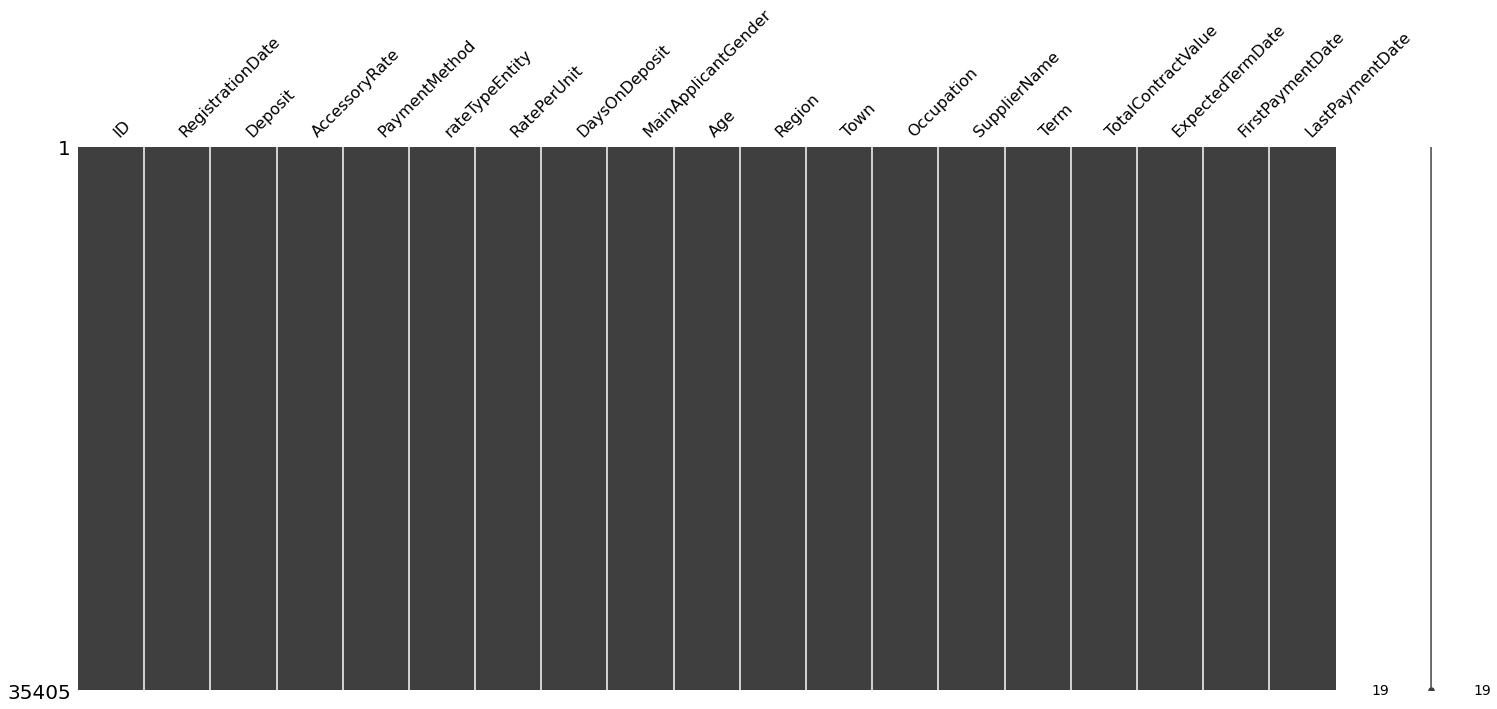

In [96]:
metadata = metadata.loc[~(metadata.Region.isna())]
msno.matrix(metadata)

In [97]:
metadata.head(10)

ID RegistrationDate  Deposit  AccessoryRate PaymentMethod  \
0   ID_K00S4N4       2015-12-10     2000            0.0      FINANCED   
1   ID_6L67PAA       2015-12-09     2000            0.0      FINANCED   
2   ID_102CV85       2015-12-18     2000           35.0      FINANCED   
4   ID_3K9VZ5J       2015-12-02     2000            0.0      FINANCED   
5   ID_VJ80SX2       2015-12-14     2000            0.0      FINANCED   
6   ID_6YU5YRB       2015-12-10     2000            0.0      FINANCED   
7   ID_FK5A5E9       2015-12-11     2000            0.0      FINANCED   
8   ID_7OU9HLK       2015-12-06     2000            0.0      FINANCED   
9   ID_WVWTPGK       2015-12-05     2000            0.0      FINANCED   
10  ID_EL1XKC7       2015-12-09     2000            0.0      FINANCED   

   rateTypeEntity  RatePerUnit  DaysOnDeposit MainApplicantGender        Age  \
0           DAILY           35              7                Male  41.000000   
1           DAILY           35              7                Male  33.000000   
2           DAILY           35              7              Female  48.000000   
4           DAILY           35              7              Female  56.000000   
5           DAILY           35              7              Female  42.363643   
6           DAILY           35              7                Male  56.000000   
7           DAILY           35              7              Female  41.000000   
8           DAILY           35              7                Male  32.000000   
9           DAILY           35              7              Female  42.000000   
10          DAILY           35              7                Male  43.000000   

                Region       Town Occupation SupplierName  Term  \
0   Mount Kenya Region       Embu      Other      d_light   364   
1         Coast Region     Kilifi      Other      d_light   364   
2       Nairobi Region    Makueni   Business      d_light   392   
4   Mount Kenya Region  Kirinyaga      Other      d_light   364   
5   Mount Kenya Region       Embu   Business      d_light   364   
6   Mount Kenya Region       Meru      Other      d_light   364   
7   Mount Kenya Region       Embu      Other      d_light   364   
8   Mount Kenya Region       Embu   Business      d_light   364   
9   Mount Kenya Region  Kirinyaga      Other      d_light   364   
10      Nairobi Region      Kitui      Other      d_light   364   

    TotalContractValue ExpectedTermDate    FirstPaymentDate  \
0              14740.0       2016-12-08 2015-12-10 09:52:35   
1              14740.0       2016-12-07 2015-12-09 13:14:03   
2              29480.0       2017-01-13 2015-12-18 06:22:34   
4              14740.0       2016-11-30 2015-12-05 10:34:32   
5              14740.0       2016-12-12 2015-12-14 14:20:26   
6              14740.0       2016-12-08 2015-12-10 15:15:16   
7              14740.0       2016-12-09 2015-12-11 10:34:10   
8              14740.0       2016-12-04 2015-12-06 16:41:21   
9              14740.0       2016-12-03 2015-12-04 18:11:33   
10             14740.0       2016-12-07 2015-12-09 09:23:37   

       LastPaymentDate  
0  2016-10-23 04:52:30  
1  2020-05-24 15:32:18  
2  2017-02-01 15:23:44  
4  2017-05-12 16:50:52  
5  2016-12-12 11:59:20  
6  2016-12-11 11:48:01  
7  2017-01-08 15:50:18  
8  2020-07-22 07:08:17  
9  2017-05-17 16:26:08  
10 2016-12-14 06:18:11

In [98]:
metadata.dtypes

ID                             object
RegistrationDate       datetime64[ns]
Deposit                         int64
AccessoryRate                 float64
PaymentMethod                  object
rateTypeEntity                 object
RatePerUnit                     int64
DaysOnDeposit                   int64
MainApplicantGender            object
Age                           float64
Region                         object
Town                           object
Occupation                     object
SupplierName                   object
Term                            int64
TotalContractValue            float64
ExpectedTermDate       datetime64[ns]
FirstPaymentDate       datetime64[ns]
LastPaymentDate        datetime64[ns]
dtype: object

In [99]:
metadata.loc[(metadata.FirstPaymentDate.dt.date-metadata.RegistrationDate.dt.date) > pd.to_timedelta(metadata.DaysOnDeposit, unit="d")]

ID    RegistrationDate  Deposit  AccessoryRate PaymentMethod  \
96     ID_94RMUU4 2016-09-30 18:10:02     2500           40.0      FINANCED   
11184  ID_NGBXAHV 2017-11-13 11:38:41     2000            0.0      FINANCED   
14793  ID_N1R96SK 2018-02-04 08:09:49     2999            0.0      FINANCED   
21146  ID_QI7FJVT 2018-03-22 17:37:24     2999            0.0      FINANCED   
29667  ID_PYU6B0N 2020-01-09 21:34:36        0            0.0      FINANCED   

      rateTypeEntity  RatePerUnit  DaysOnDeposit MainApplicantGender  \
96             DAILY           40              7              Female   
11184          DAILY           40              7              Female   
14793          DAILY           55              3                Male   
21146          DAILY           55              3              Female   
29667          DAILY           67              0                Male   

             Age              Region         Town           Occupation  \
96     51.000000              Nyanza        Kisii               Farmer   
11184  63.000000  Mount Kenya Region         Meru               Farmer   
14793  36.000000              Nyanza       Kisumu                Other   
21146  39.175234          North Rift  Trans Nzoia             Business   
29667  37.000000  Mount Kenya Region         Meru  Government Employee   

      SupplierName  Term  TotalContractValue    ExpectedTermDate  \
96         d_light   395             34120.0 2017-10-30 18:10:02   
11184      d_light   364             16560.0 2018-11-12 11:38:41   
14793      d_light   547             33084.0 2019-08-05 08:09:49   
21146      d_light   547             33084.0 2019-09-20 17:37:24   
29667      d_light   179             12000.0 2020-07-06 21:34:36   

         FirstPaymentDate     LastPaymentDate  
96    2016-10-09 16:00:30 2017-12-19 17:07:57  
11184 2017-11-29 06:07:03 2020-06-20 16:36:11  
14793 2018-03-02 04:24:52 2019-11-27 15:05:11  
21146 2018-04-05 08:39:13 2020-02-28 15:49:23  
29667 2020-01-10 10:54:39 2021-05-25 13:56:31

In [100]:
metadata.loc[metadata.LastPaymentDate.dt.date > metadata.ExpectedTermDate.dt.date ]

ID    RegistrationDate  Deposit  AccessoryRate PaymentMethod  \
1      ID_6L67PAA 2015-12-09 00:00:00     2000            0.0      FINANCED   
2      ID_102CV85 2015-12-18 00:00:00     2000           35.0      FINANCED   
4      ID_3K9VZ5J 2015-12-02 00:00:00     2000            0.0      FINANCED   
6      ID_6YU5YRB 2015-12-10 00:00:00     2000            0.0      FINANCED   
7      ID_FK5A5E9 2015-12-11 00:00:00     2000            0.0      FINANCED   
...           ...                 ...      ...            ...           ...   
37337  ID_WKQPWF3 2020-02-20 18:21:41     2280            0.0      FINANCED   
37338  ID_OKJ96OW 2020-02-20 18:26:52     2400            0.0      FINANCED   
37339  ID_5J9OMUP 2020-02-20 18:30:59     2400            0.0      FINANCED   
37340  ID_J4I8Z2V 2020-02-20 18:42:26     3000            0.0      FINANCED   
37342  ID_PAI1FJK 2020-02-20 19:30:43     2400            0.0      FINANCED   

      rateTypeEntity  RatePerUnit  DaysOnDeposit MainApplicantGender   Age  \
1              DAILY           35              7                Male  33.0   
2              DAILY           35              7              Female  48.0   
4              DAILY           35              7              Female  56.0   
6              DAILY           35              7                Male  56.0   
7              DAILY           35              7              Female  41.0   
...              ...          ...            ...                 ...   ...   
37337         WEEKLY          280             10              Female  29.0   
37338          DAILY           50              3              Female  38.0   
37339          DAILY           50              3                Male  23.0   
37340          DAILY           40              3                Male  31.0   
37342          DAILY           50              3                Male  36.0   

                   Region       Town Occupation SupplierName  Term  \
1            Coast Region     Kilifi      Other      d_light   364   
2          Nairobi Region    Makueni   Business      d_light   392   
4      Mount Kenya Region  Kirinyaga      Other      d_light   364   
6      Mount Kenya Region       Meru      Other      d_light   364   
7      Mount Kenya Region       Embu      Other      d_light   364   
...                   ...        ...        ...          ...   ...   
37337              Nyanza      Siaya   Business      d_light    37   
37338             Western    Bungoma     Farmer      d_light   240   
37339              Nyanza      Siaya   Labourer      d_light   240   
37340        Coast Region      Kwale    Teacher      d_light   340   
37342        Coast Region    Mombasa     Farmer      d_light   240   

       TotalContractValue    ExpectedTermDate    FirstPaymentDate  \
1                 14740.0 2016-12-07 00:00:00 2015-12-09 13:14:03   
2                 29480.0 2017-01-13 00:00:00 2015-12-18 06:22:34   
4                 14740.0 2016-11-30 00:00:00 2015-12-05 10:34:32   
6                 14740.0 2016-12-08 00:00:00 2015-12-10 15:15:16   
7                 14740.0 2016-12-09 00:00:00 2015-12-11 10:34:10   
...                   ...                 ...                 ...   
37337             12800.0 2020-03-28 18:21:41 2020-02-20 18:21:48   
37338             14400.0 2020-10-17 18:26:52 2020-02-20 18:26:58   
37339             14400.0 2020-10-17 18:30:59 2020-02-20 18:31:06   
37340             16600.0 2021-01-25 18:42:26 2020-02-20 18:42:33   
37342             14400.0 2020-10-17 19:30:43 2020-02-20 19:30:49   

          LastPaymentDate  
1     2020-05-24 15:32:18  
2     2017-02-01 15:23:44  
4     2017-05-12 16:50:52  
6     2016-12-11 11:48:01  
7     2017-01-08 15:50:18  
...                   ...  
37337 2020-12-06 17:36:17  
37338 2020-12-19 07:16:44  
37339 2021-05-18 16:07:49  
37340 2021-04-21 15:59:37  
37342 2021-05-26 18:52:23  

[34313 rows x 19 columns]

In [101]:
metadata["DaysLate"] = (metadata.LastPaymentDate.dt.date - metadata.ExpectedTermDate.dt.date).astype('timedelta64[D]')
metadata.loc[metadata.DaysLate<=0,"DaysLate"]=0.0

In [102]:
metadata["ExpectedTerm"] = (metadata.LastPaymentDate.dt.date - metadata.FirstPaymentDate.dt.date).astype('timedelta64[D]')

In [103]:
metadata.head()

ID RegistrationDate  Deposit  AccessoryRate PaymentMethod  \
0  ID_K00S4N4       2015-12-10     2000            0.0      FINANCED   
1  ID_6L67PAA       2015-12-09     2000            0.0      FINANCED   
2  ID_102CV85       2015-12-18     2000           35.0      FINANCED   
4  ID_3K9VZ5J       2015-12-02     2000            0.0      FINANCED   
5  ID_VJ80SX2       2015-12-14     2000            0.0      FINANCED   

  rateTypeEntity  RatePerUnit  DaysOnDeposit MainApplicantGender        Age  \
0          DAILY           35              7                Male  41.000000   
1          DAILY           35              7                Male  33.000000   
2          DAILY           35              7              Female  48.000000   
4          DAILY           35              7              Female  56.000000   
5          DAILY           35              7              Female  42.363643   

   ...       Town Occupation SupplierName Term  TotalContractValue  \
0  ...       Embu      Other      d_light  364             14740.0   
1  ...     Kilifi      Other      d_light  364             14740.0   
2  ...    Makueni   Business      d_light  392             29480.0   
4  ...  Kirinyaga      Other      d_light  364             14740.0   
5  ...       Embu   Business      d_light  364             14740.0   

   ExpectedTermDate    FirstPaymentDate     LastPaymentDate DaysLate  \
0        2016-12-08 2015-12-10 09:52:35 2016-10-23 04:52:30      0.0   
1        2016-12-07 2015-12-09 13:14:03 2020-05-24 15:32:18   1264.0   
2        2017-01-13 2015-12-18 06:22:34 2017-02-01 15:23:44     19.0   
4        2016-11-30 2015-12-05 10:34:32 2017-05-12 16:50:52    163.0   
5        2016-12-12 2015-12-14 14:20:26 2016-12-12 11:59:20      0.0   

   ExpectedTerm  
0         318.0  
1        1628.0  
2         411.0  
4         524.0  
5         364.0  

[5 rows x 21 columns]

In [104]:
metadata.nunique()

ID                     35405
RegistrationDate       35281
Deposit                   11
AccessoryRate             17
PaymentMethod              1
rateTypeEntity             3
RatePerUnit               11
DaysOnDeposit              6
MainApplicantGender        2
Age                      103
Region                     7
Town                      47
Occupation                 7
SupplierName               1
Term                      44
TotalContractValue        31
ExpectedTermDate       35278
FirstPaymentDate       35347
LastPaymentDate        34933
DaysLate                1073
ExpectedTerm            1155
dtype: int64

Since the supplier name is same for all the IDs. We can drop SupplierName col.
The payment method is also the same and that can be dropped as well.


In [105]:
metadata.drop(columns=["SupplierName","PaymentMethod"],inplace=True)

Dropping categorical variables for now

In [106]:
metadata.drop(columns=["RegistrationDate", "rateTypeEntity", "MainApplicantGender", "Region", "Town", "Occupation", "ExpectedTermDate", "FirstPaymentDate", "LastPaymentDate"],inplace=True)

In [107]:
metadata.shape

(35405, 10)

In [108]:
metadata.dtypes

ID                     object
Deposit                 int64
AccessoryRate         float64
RatePerUnit             int64
DaysOnDeposit           int64
Age                   float64
Term                    int64
TotalContractValue    float64
DaysLate              float64
ExpectedTerm          float64
dtype: object

Dropping categorical columns

In [109]:
merged_test = pd.merge(left=metadata, right=test, on="ID")

In [110]:
merged_test

ID  Deposit  AccessoryRate  RatePerUnit  DaysOnDeposit  \
0     ID_6L67PAA     2000            0.0           35              7   
1     ID_VJ80SX2     2000            0.0           35              7   
2     ID_7OU9HLK     2000            0.0           35              7   
3     ID_WVWTPGK     2000            0.0           35              7   
4     ID_04DSDQS     2000            0.0           35              7   
...          ...      ...            ...          ...            ...   
8842  ID_ATLMXQX     2400            0.0           50              3   
8843  ID_DYMC72D     2400            0.0           50              3   
8844  ID_5CBGHCN     2400            0.0           50              3   
8845  ID_HYHB585     2400            0.0           50              3   
8846  ID_WKQPWF3     2280            0.0          280             10   

            Age  Term  TotalContractValue  DaysLate  ExpectedTerm  ...  \
0     33.000000   364             14740.0    1264.0        1628.0  ...   
1     42.363643   364             14740.0       0.0         364.0  ...   
2     32.000000   364             14740.0    1326.0        1690.0  ...   
3     42.000000   364             14740.0     165.0         530.0  ...   
4     38.000000   364             14740.0      64.0         428.0  ...   
...         ...   ...                 ...       ...           ...  ...   
8842  33.000000   240             14400.0     220.0         460.0  ...   
8843  36.000000   240             14400.0     221.0         461.0  ...   
8844  26.000000   240             14400.0     210.0         450.0  ...   
8845  26.000000   240             14400.0     221.0         461.0  ...   
8846  29.000000    37             12800.0     253.0         290.0  ...   

     2020-02-01 2020-03-01  2020-04-01  2020-05-01  2020-06-01  2020-07-01  \
0           0.0        0.0         0.0         0.0         0.0         0.0   
1           0.0        0.0         0.0         0.0         0.0         0.0   
2           0.0        0.0         0.0         0.0         0.0         0.0   
3           0.0        0.0         0.0         0.0         0.0         0.0   
4           0.0        0.0         0.0         0.0         0.0         0.0   
...         ...        ...         ...         ...         ...         ...   
8842     2690.0      270.0       770.0      1100.0       700.0       550.0   
8843     2950.0     1550.0      1500.0       900.0        80.0      1550.0   
8844     2550.0      500.0       550.0       250.0       200.0       450.0   
8845     2700.0      800.0       250.0       300.0      1100.0       950.0   
8846     2300.0     1320.0      1050.0      1300.0      1150.0         0.0   

      2020-08-01  2020-09-01  2020-10-01  2020-11-01  
0            0.0         0.0         0.0         0.0  
1            0.0         0.0         0.0         0.0  
2            0.0         0.0         0.0         0.0  
3            0.0         0.0         0.0         0.0  
4            0.0         0.0         0.0         0.0  
...          ...         ...         ...         ...  
8842       500.0       280.0       900.0       900.0  
8843      1250.0       200.0       520.0         0.0  
8844       450.0       600.0       200.0       450.0  
8845       800.0       200.0       150.0       300.0  
8846         0.0         0.0         0.0         0.0  

[8847 rows x 74 columns]

In [111]:
merged_test.drop(columns=['FirstTransactionDate', 'LastTransactionDate'],inplace=True)

In [112]:
merged_test.to_pickle("merged_test-processed.pkl")

In [113]:
merged_train = pd.merge(left=metadata, right=train, on="ID")

In [114]:
merged_train

ID  Deposit  AccessoryRate  RatePerUnit  DaysOnDeposit   Age  \
0      ID_K00S4N4     2000            0.0           35              7  41.0   
1      ID_102CV85     2000           35.0           35              7  48.0   
2      ID_3K9VZ5J     2000            0.0           35              7  56.0   
3      ID_6YU5YRB     2000            0.0           35              7  56.0   
4      ID_FK5A5E9     2000            0.0           35              7  41.0   
...           ...      ...            ...          ...            ...   ...   
26519  ID_PIH3043     2400            0.0           50              3  39.0   
26520  ID_OKJ96OW     2400            0.0           50              3  38.0   
26521  ID_5J9OMUP     2400            0.0           50              3  23.0   
26522  ID_J4I8Z2V     3000            0.0           40              3  31.0   
26523  ID_PAI1FJK     2400            0.0           50              3  36.0   

       Term  TotalContractValue  DaysLate  ExpectedTerm  ...  2020-02-01  \
0       364             14740.0       0.0         318.0  ...         0.0   
1       392             29480.0      19.0         411.0  ...         0.0   
2       364             14740.0     163.0         524.0  ...         0.0   
3       364             14740.0       3.0         367.0  ...         0.0   
4       364             14740.0      30.0         394.0  ...         0.0   
...     ...                 ...       ...           ...  ...         ...   
26519   240             14400.0      83.0         323.0  ...      2550.0   
26520   240             14400.0      63.0         303.0  ...      2680.0   
26521   240             14400.0     213.0         453.0  ...      2700.0   
26522   340             16600.0      86.0         426.0  ...      3680.0   
26523   240             14400.0     221.0         461.0  ...      2450.0   

       2020-03-01  2020-04-01  2020-05-01  2020-06-01  2020-07-01 2020-08-01  \
0             0.0         0.0         0.0         0.0         0.0        0.0   
1             0.0         0.0         0.0         0.0         0.0        0.0   
2             0.0         0.0         0.0         0.0         0.0        0.0   
3             0.0         0.0         0.0         0.0         0.0        0.0   
4             0.0         0.0         0.0         0.0         0.0        0.0   
...           ...         ...         ...         ...         ...        ...   
26519      1450.0      1350.0       250.0       600.0       950.0        0.0   
26520      1240.0      1230.0      1100.0      1400.0         0.0        0.0   
26521       400.0       950.0      1150.0      1150.0       750.0     1150.0   
26522       600.0       920.0       920.0       920.0      1240.0     1080.0   
26523        50.0         0.0        50.0      1350.0       450.0     1050.0   

      2020-09-01  2020-10-01  2020-11-01  
0            0.0         0.0         0.0  
1            0.0         0.0         0.0  
2            0.0         0.0         0.0  
3            0.0         0.0         0.0  
4            0.0         0.0         0.0  
...          ...         ...         ...  
26519        0.0         0.0         0.0  
26520        0.0         0.0         0.0  
26521     1250.0         0.0         0.0  
26522     1000.0       960.0         0.0  
26523      700.0      1150.0       760.0  

[26524 rows x 80 columns]

In [115]:
merged_train.drop(columns=['FirstTransactionDate', 'LastTransactionDate'],inplace=True)

In [116]:
merged_train.to_pickle("merged_train-processed.pkl")